<IPython.core.display.Javascript object>


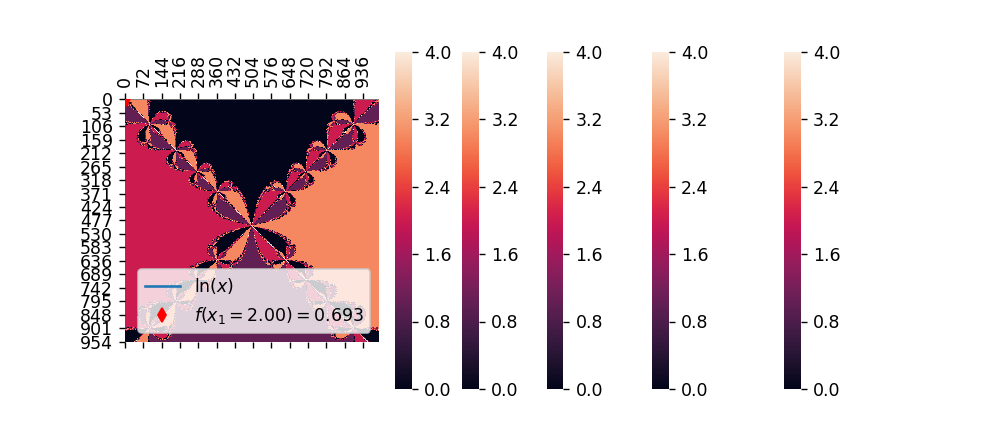

interactive(children=(IntSlider(value=1, description='step', max=6, min=1), Output()), _dom_classes=('widget-i…

In [385]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
%matplotlib nbagg

x = np.linspace(0.2, 2.2, 500)

def f(x):
    return np.log(x)

def df(x):
    return 1/x

def f_line(f, df, x, x_n):
    slope = df(x_n)
    x_nn = x_n - f(x_n) / slope 
    return slope * (x - x_n) + f(x_n), x_nn

def update_plot(steps):
    x_n = 2
    ax.clear()
    ax.plot(x, f(x), label=r'$\ln(x)$')
    ax.axhline(0, color='gray', lw=0.5)
    
    for i in range(steps):
        if i > 0:
            ax.plot(x, f_l, '--', lw=1)
        
        color = 'r' if i == steps-1 else 'black'    
        ax.plot(x_n, f(x_n), 'kd', color=color, label=r'$f(x_{}={:.2f})={:.3f}$'.format(i + 1, x_n, f(x_n)))
        ax.vlines(x_n, 0, f(x_n), color='black', linestyle=':', lw=1)
        f_l, x_n = f_line(f, df, x, x_n)
    
    plt.setp(ax, xticks=[0, 1, 2], yticks=[-1, 0, 1])
    ax.set_ylim(-1, 1)
    ax.set_xlim(0, 2.2)
    ax.legend(loc=4)
    plt.show()

fig, ax = plt.subplots(1, figsize=(8, 3.5))
steps = widgets.IntSlider(min=1, max=6, value=1, description='step')
widgets.interactive(update_plot, steps=steps)

<IPython.core.display.Javascript object>


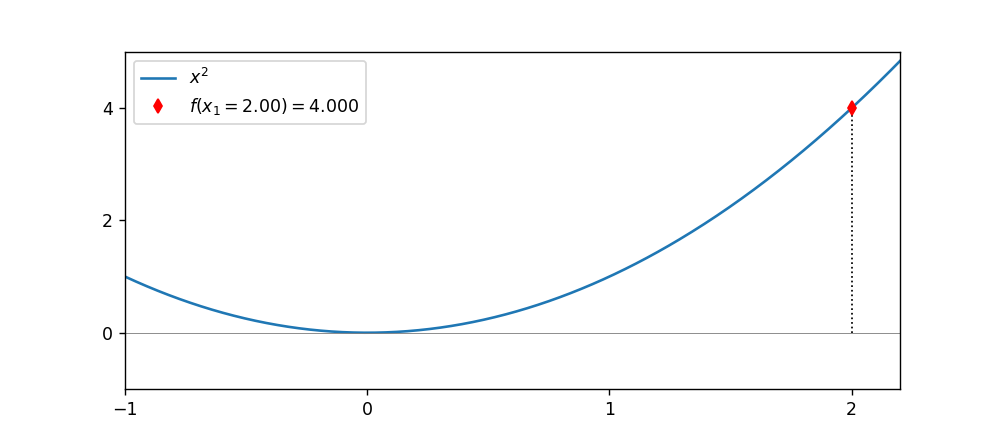

interactive(children=(IntSlider(value=1, description='step', max=8, min=1), Output()), _dom_classes=('widget-i…

In [259]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
%matplotlib nbagg

x = np.linspace(-1, 2.2, 500)

def f(x):
    return x*x

def df(x):
    return 2*x

def f_line(f, df, x, x_n):
    slope = df(x_n)
    x_nn = x_n - f(x_n) / slope 
    return slope * (x - x_n) + f(x_n), x_nn

def update_plot(steps):
    colors = ['b', 'g', 'r', 'black', 'magenta', 'cyan', 'yellow', 'white']
    markers = ['*', 'kd', 'x', 'P', 'o', 's', '8', 'X']
    x_n = 2
    ax.clear()
    ax.plot(x, f(x), label=r'$x^2$')
    ax.axhline(0, color='gray', lw=0.5)
    
    for i in range(steps):
        if i > 0:
            ax.plot(x, f_l, '--', lw=1)
            
        color = 'r' if i == steps-1 else 'black'
        ax.plot(x_n, f(x_n), 'kd', color=color, label=r'$f(x_{}={:.2f})={:.3f}$'.format(i + 1, x_n, f(x_n)))
        ax.vlines(x_n, 0, f(x_n), color='black', linestyle=':', lw=1)
        f_l, x_n = f_line(f, df, x, x_n)
    
    plt.setp(ax, xticks=[-1, 0, 1, 2], yticks=[0, 2, 4])
    ax.set_ylim(-1, 5)
    ax.set_xlim(-1, 2.2)
    ax.legend(loc=2)
    plt.show()

fig, ax = plt.subplots(1, figsize=(8, 3.5))
steps = widgets.IntSlider(min=1, max=8, value=1, description='step')
widgets.interactive(update_plot, steps=steps)

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

In [635]:
def newton(f, df, x, eps, max_iters):
    #print('Initial guess is x_{} = {:.6f}\n'.format(0, x))
    
    i = 1 
    while abs(f(x)) > eps and i <= max_iters:
        i += 1
        x = x - f(x) / df(x)
        #print('x_{} = {:.6f},   f(x_{}) = {:.8f}'.format(i, x, i, f(x)))
    
    if abs(f(x)) > eps:
        #print('\nThe method did not converge after {} iterations with eps = {}.'.format(max_iters, eps))
        return np.nan
    else:
        #print('\nConverged to x_{} = {:.6f} after {} iterations with eps = {}.'.format(i-1, x, i-1, eps))
        return x

In [316]:
f = lambda x: np.log(x)
df = lambda x: 1/x

newton(f, df, 2.0, 1e-8, 10)

Initial guess is x_0 = 2.000000

x_2 = 0.613706,   f(x_2) = -0.48823988
x_3 = 0.913341,   f(x_3) = -0.09064575
x_4 = 0.996132,   f(x_4) = -0.00387580
x_5 = 0.999993,   f(x_5) = -0.00000749
x_6 = 1.000000,   f(x_6) = -0.00000000

Converged to x_5 = 1.000000 after 5 iterations with eps = 1e-08.


0.9999999999719384

In [265]:
import cmath

z = 0.4 + 2.2j
print(z)

(0.4+2.2j)


In [317]:
f = lambda x: x*x + 1
df = lambda x: 2*x
newton(f, df, z, 1e-6, 200)

Initial guess is x_0 = 0.400000+2.200000j

x_2 = 0.160000+1.320000j,   f(x_2) = -0.71680000+0.42240000j
x_3 = 0.034751+1.033303j,   f(x_3) = -0.06650779+0.07181691j
x_4 = 0.001120+0.999990j,   f(x_4) = 0.00002126+0.00224070j
x_5 = -0.000000+0.999999j,   f(x_5) = 0.00000126-0.00000002j
x_6 = 0.000000+1.000000j,   f(x_6) = -0.00000000+0.00000000j

Converged to x_5 = 0.000000+1.000000j after 5 iterations with eps = 1e-06.


(6.592114462854643e-15+1.000000000000197j)

In [395]:
X = np.linspace(-2, 2, 1000)
XX, YY = np.meshgrid(X, X)
zzz = np.vstack([XX.ravel(), YY.ravel()]).T
aaa = [complex(v[0], v[1]) for v in zzz]

print(aaa)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [361]:
newton(f, df, complex(zzz[5][0], zzz[5][1]), 1e-6, 200)

Initial guess is x_0 = 1.100000-1.100000j


The method did not converge after 200 iterations with eps = 1e-06.


nan

In [366]:
f = lambda x: (x**2-1)*(x**2+1)/(2*x*(x**2-1)+2*x*(x**2+1))
df = lambda x: (3/4 * x**4) + 0.25

ans = newton(f, df, complex(zzz[2][0], zzz[2][1]), 1e-6, 20)

#fz = [newton(f, df, a, 1e-6, 100) for a in aaa]
#print(fz)

Initial guess is x_0 = -0.220000-1.100000j


Converged to x_9 = -0.000000-1.000000j after 9 iterations with eps = 1e-06.


In [562]:
def get_root_id(ans):
    if np.isnan(ans):
        return -1
    for i, root in enumerate(rootlist):
        if abs(ans-root) < 1e-6:
            return i

In [651]:
f = lambda x: x**4 - 1
df = lambda x: 4 * x**3
rootlist = [-1, 1, -1j, 1j]

num = 1000
X = np.linspace(-2.01, 2.01, num)
Y = np.linspace(-2.01, 2.01, num)
Z = [complex(x, y) for x in X for y in Y]

ans = [newton(f, df, initial_guess, 1e-6, 200) for initial_guess in Z]
root_id = [get_root_id(a) for a in ans]
root_matrix = np.transpose(np.reshape(root_id,(num,num)))

#for a in list(zip(Z, ans)):
#for a in Z:
#    print(a)

In [637]:
newton(f, df, (-2.01-2.01j), 1e-4, 20000)

nan

<IPython.core.display.Javascript object>


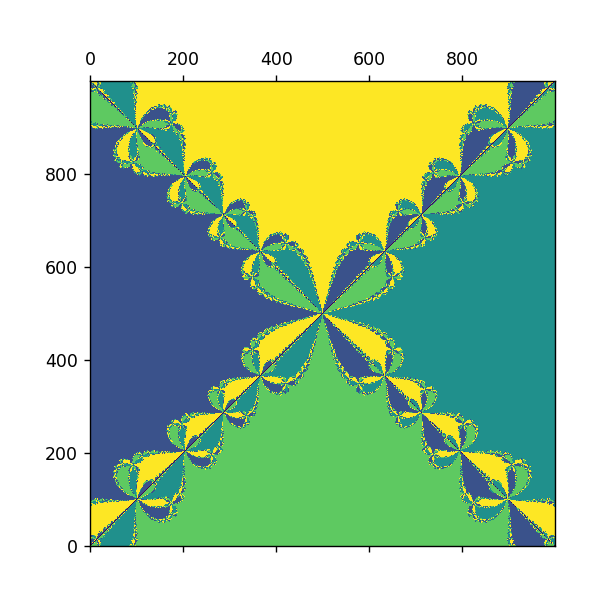

In [652]:
plt.matshow(root_matrix, interpolation='none', origin='lower')
plt.show()

In [600]:
import math

f = lambda x: np.tan(x)
df = lambda x: 1 / np.cos(x)*np.cos(x)
rootlist = [0]
for i in range(1,3):
    rootlist.append(i*np.pi)
    rootlist.append(-i*np.pi)
    
#print(rootlist)

num = 1000
X = np.linspace(-2.1, 2.1, num)
Y = np.linspace(-2.1, 2.1, num)
Z = [complex(x, y) for x in X for y in Y]

ans = [newton(f, df, initial_guess, 1e-6, 200) for initial_guess in Z]
root_id = [get_root_id(a) for a in ans]
root_id = [i if i is not None else -1 for i in root_id]
root_matrix = np.transpose(np.reshape(root_id,(num,num)))

<IPython.core.display.Javascript object>


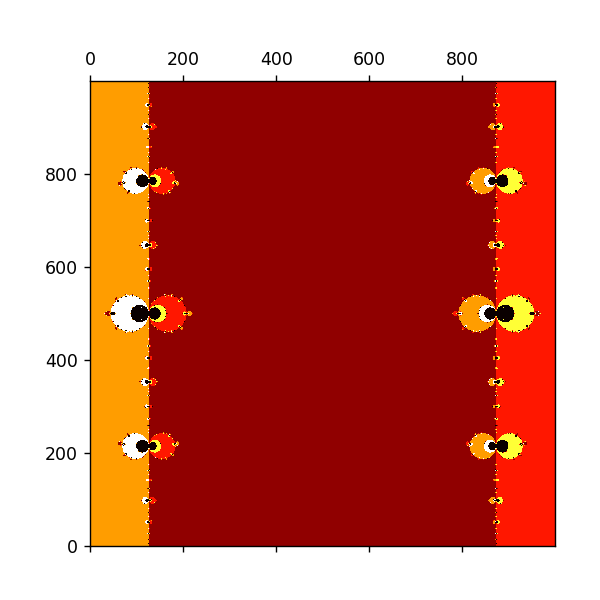

In [601]:
plt.matshow(root_matrix, interpolation='none', origin='lower', cmap='hot')
plt.show()

In [ ]:
f = lambda x: 
df = lambda x: 1 / np.cos(x)*np.cos(x)
rootlist = [0]
for i in range(1,3):
    rootlist.append(i*np.pi)
    rootlist.append(-i*np.pi)
    
#print(rootlist)

num = 1000
X = np.linspace(-2.1, 2.1, num)
Y = np.linspace(-2.1, 2.1, num)
Z = [complex(x, y) for x in X for y in Y]

ans = [newton(f, df, initial_guess, 1e-6, 200) for initial_guess in Z]
root_id = [get_root_id(a) for a in ans]
root_id = [i if i is not None else -1 for i in root_id]
root_matrix = np.transpose(np.reshape(root_id,(num,num)))

In [620]:
np.linspace(-2, 2, 10)

array([-2.        , -1.55555556, -1.11111111, -0.66666667, -0.22222222,
        0.22222222,  0.66666667,  1.11111111,  1.55555556,  2.        ])